<a href="https://colab.research.google.com/github/daniel-dc-cd/data_science/blob/master/Calculating_a_Monthly_Car_Payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Your monthly payment, also called your Equated Monthly Installment (EMI) is defined by Investopedia as a fixed payment amount made by a borrower to a lender at a specified date each calendar month. Equated monthly installments are used to pay off both interest and principal each month, so that over a specified number of years, the loan is paid off in full.

A monthly payment can be calculated using an EMI formula similar to the one below.

Say I buy want to buy a 2019 Toyota Sienna for $31,115. I am curious how much it will cost me each month if I decide on taking out a loan to buy this new vehicle. A car dealer offers me a fixed interest rate of 7.02% over a 60 month term. How much would a monthly car payment be assuming the sales tax rate is 7.5%?


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

P = 31115 * (1.075)
r = 0.0702 / 12
n = 60
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator / denominator)
np.round(emi,2)

662.64



While this is a simplified and relatively accurate calculation (except for the sales tax being an assumption), more accurate calculations require work. Data Analytics/Science is about communicating results. We really do need how to do something more complicated (how much in total interest are we paying, how do we visualize this . This is what we will explore in future lectures.




**Challenge Question: Calculate Total Interest Paid Over the Course of a Loan**


1) The first thing is to calculate how much of the monthly payment will be paid towards interest in a month.


**Interest paid**: where r is the interest rate (APR) and P is the principal
$$r*P$$





2) Each month, some of the monthly payment is paid towards principal and some towards interest. As principal lowers, to work out the interest you pay in the following months, you need to first calculate your new principal. You can see how to calculate this below.

3) Repeat steps 1 and 2 until the principal reaches 0. You can see an example of this in the Python code below.

In [18]:
term = 63
P = 34689.96 #total purchase price with tax

def calc_interest(P, emi, interest_rate = 0.0702):
  interest_paid = np.floor(((interest_rate/12)*P)*100)/100
  principal_paid = np.round(emi-interest_paid, 2)
  new_balance = np.round(P - principal_paid, 2)
  return(emi, interest_paid, principal_paid, new_balance)

payment_list = []

for n in range(1, term + 1):
  emi, i_paid, p_paid, new_p = calc_interest(P, emi)
  payment_list.append([n,P,emi,i_paid,p_paid,new_p])
  P = np.round(new_p, 2)    

payment_list

[[1, 34689.96, 662.638532377825, 202.93, 459.71, 34230.25],
 [2, 34230.25, 662.638532377825, 200.24, 462.4, 33767.85],
 [3, 33767.85, 662.638532377825, 197.54, 465.1, 33302.75],
 [4, 33302.75, 662.638532377825, 194.82, 467.82, 32834.93],
 [5, 32834.93, 662.638532377825, 192.08, 470.56, 32364.37],
 [6, 32364.37, 662.638532377825, 189.33, 473.31, 31891.06],
 [7, 31891.06, 662.638532377825, 186.56, 476.08, 31414.98],
 [8, 31414.98, 662.638532377825, 183.77, 478.87, 30936.11],
 [9, 30936.11, 662.638532377825, 180.97, 481.67, 30454.44],
 [10, 30454.44, 662.638532377825, 178.15, 484.49, 29969.95],
 [11, 29969.95, 662.638532377825, 175.32, 487.32, 29482.63],
 [12, 29482.63, 662.638532377825, 172.47, 490.17, 28992.46],
 [13, 28992.46, 662.638532377825, 169.6, 493.04, 28499.42],
 [14, 28499.42, 662.638532377825, 166.72, 495.92, 28003.5],
 [15, 28003.5, 662.638532377825, 163.82, 498.82, 27504.68],
 [16, 27504.68, 662.638532377825, 160.9, 501.74, 27002.94],
 [17, 27002.94, 662.638532377825, 157.9

In [19]:
c_names = ['Month','Starting Balance','Repayment','Interest Paid','Principal Paid','New Balance']
payment_table = pd.DataFrame(payment_list, columns = c_names)

In [20]:
payment_table.tail()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
58,59,3054.37,662.638532,17.86,644.78,2409.59
59,60,2409.59,662.638532,14.09,648.55,1761.04
60,61,1761.04,662.638532,10.30,652.34,1108.70
61,62,1108.70,662.638532,6.48,656.16,452.54
62,63,452.54,662.638532,2.64,660.00,-207.46


In [14]:
np.round(payment_table['Interest Paid'].sum(), 2)

6829.48

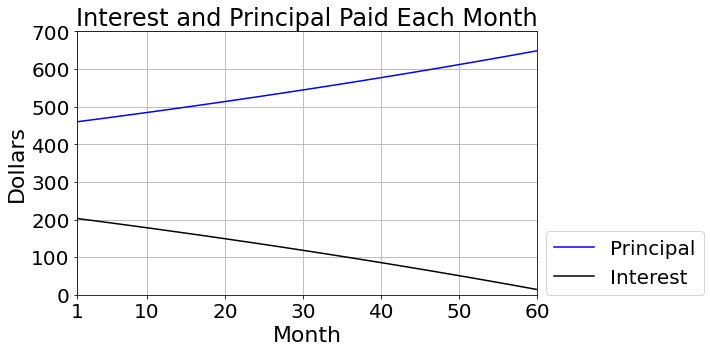

In [15]:


fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
#plt.savefig('Interest_Principal.png', dpi = 1000)

